In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('stopwords')

stops = set(stopwords.words('english'))
stops = stops.union({'said', 'would', 'could', 'told', 'also', 'one', 'two', 'mr', 'new', 'year'})

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df = pd.read_csv('Reviews.csv')
df.dropna(axis = 0, how ='any', inplace=True) 
df['Num_words_text'] = df['Text'].apply(lambda x:len(str(x).split()))
max_review_data_sentence_length  = df['Num_words_text'].max()
mask = (df['Num_words_text'] < 100) & (df['Num_words_text'] >=20)
df = df[mask]
df = df.groupby('Score').apply(lambda x: x.sample(n=10000)).reset_index(drop = True)
len(df)

50000

In [25]:
vectorizer = CountVectorizer(stop_words = list(stops))
X = vectorizer.fit_transform(df['Text'])

lda = LatentDirichletAllocation(n_components = 10, random_state = 12345)
lda.fit(X)

LatentDirichletAllocation(random_state=12345)

In [26]:
# Auxillary plotting function
def plot_top_words(model, feature_names, n_top_words = 10):
  fig, axes = plt.subplots(2, 5, figsize = (30, 15), sharex = True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]
    
    ax = axes[topic_idx]
    ax.barh(top_features, weights, height = 0.7)
    ax.set_title(f'Topic {topic_idx + 1}', fontdict = {'fontsize': 30})
    ax.invert_yaxis()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
    for i in 'top right left'.split():
      ax.spines[i].set_visible(False)
    fig.suptitle("LDA", fontsize = 40)
  
  plt.subplots_adjust(top = 0.90, bottom = 0.05, wspace = 0.90, hspace = 0.3)
  plt.show()

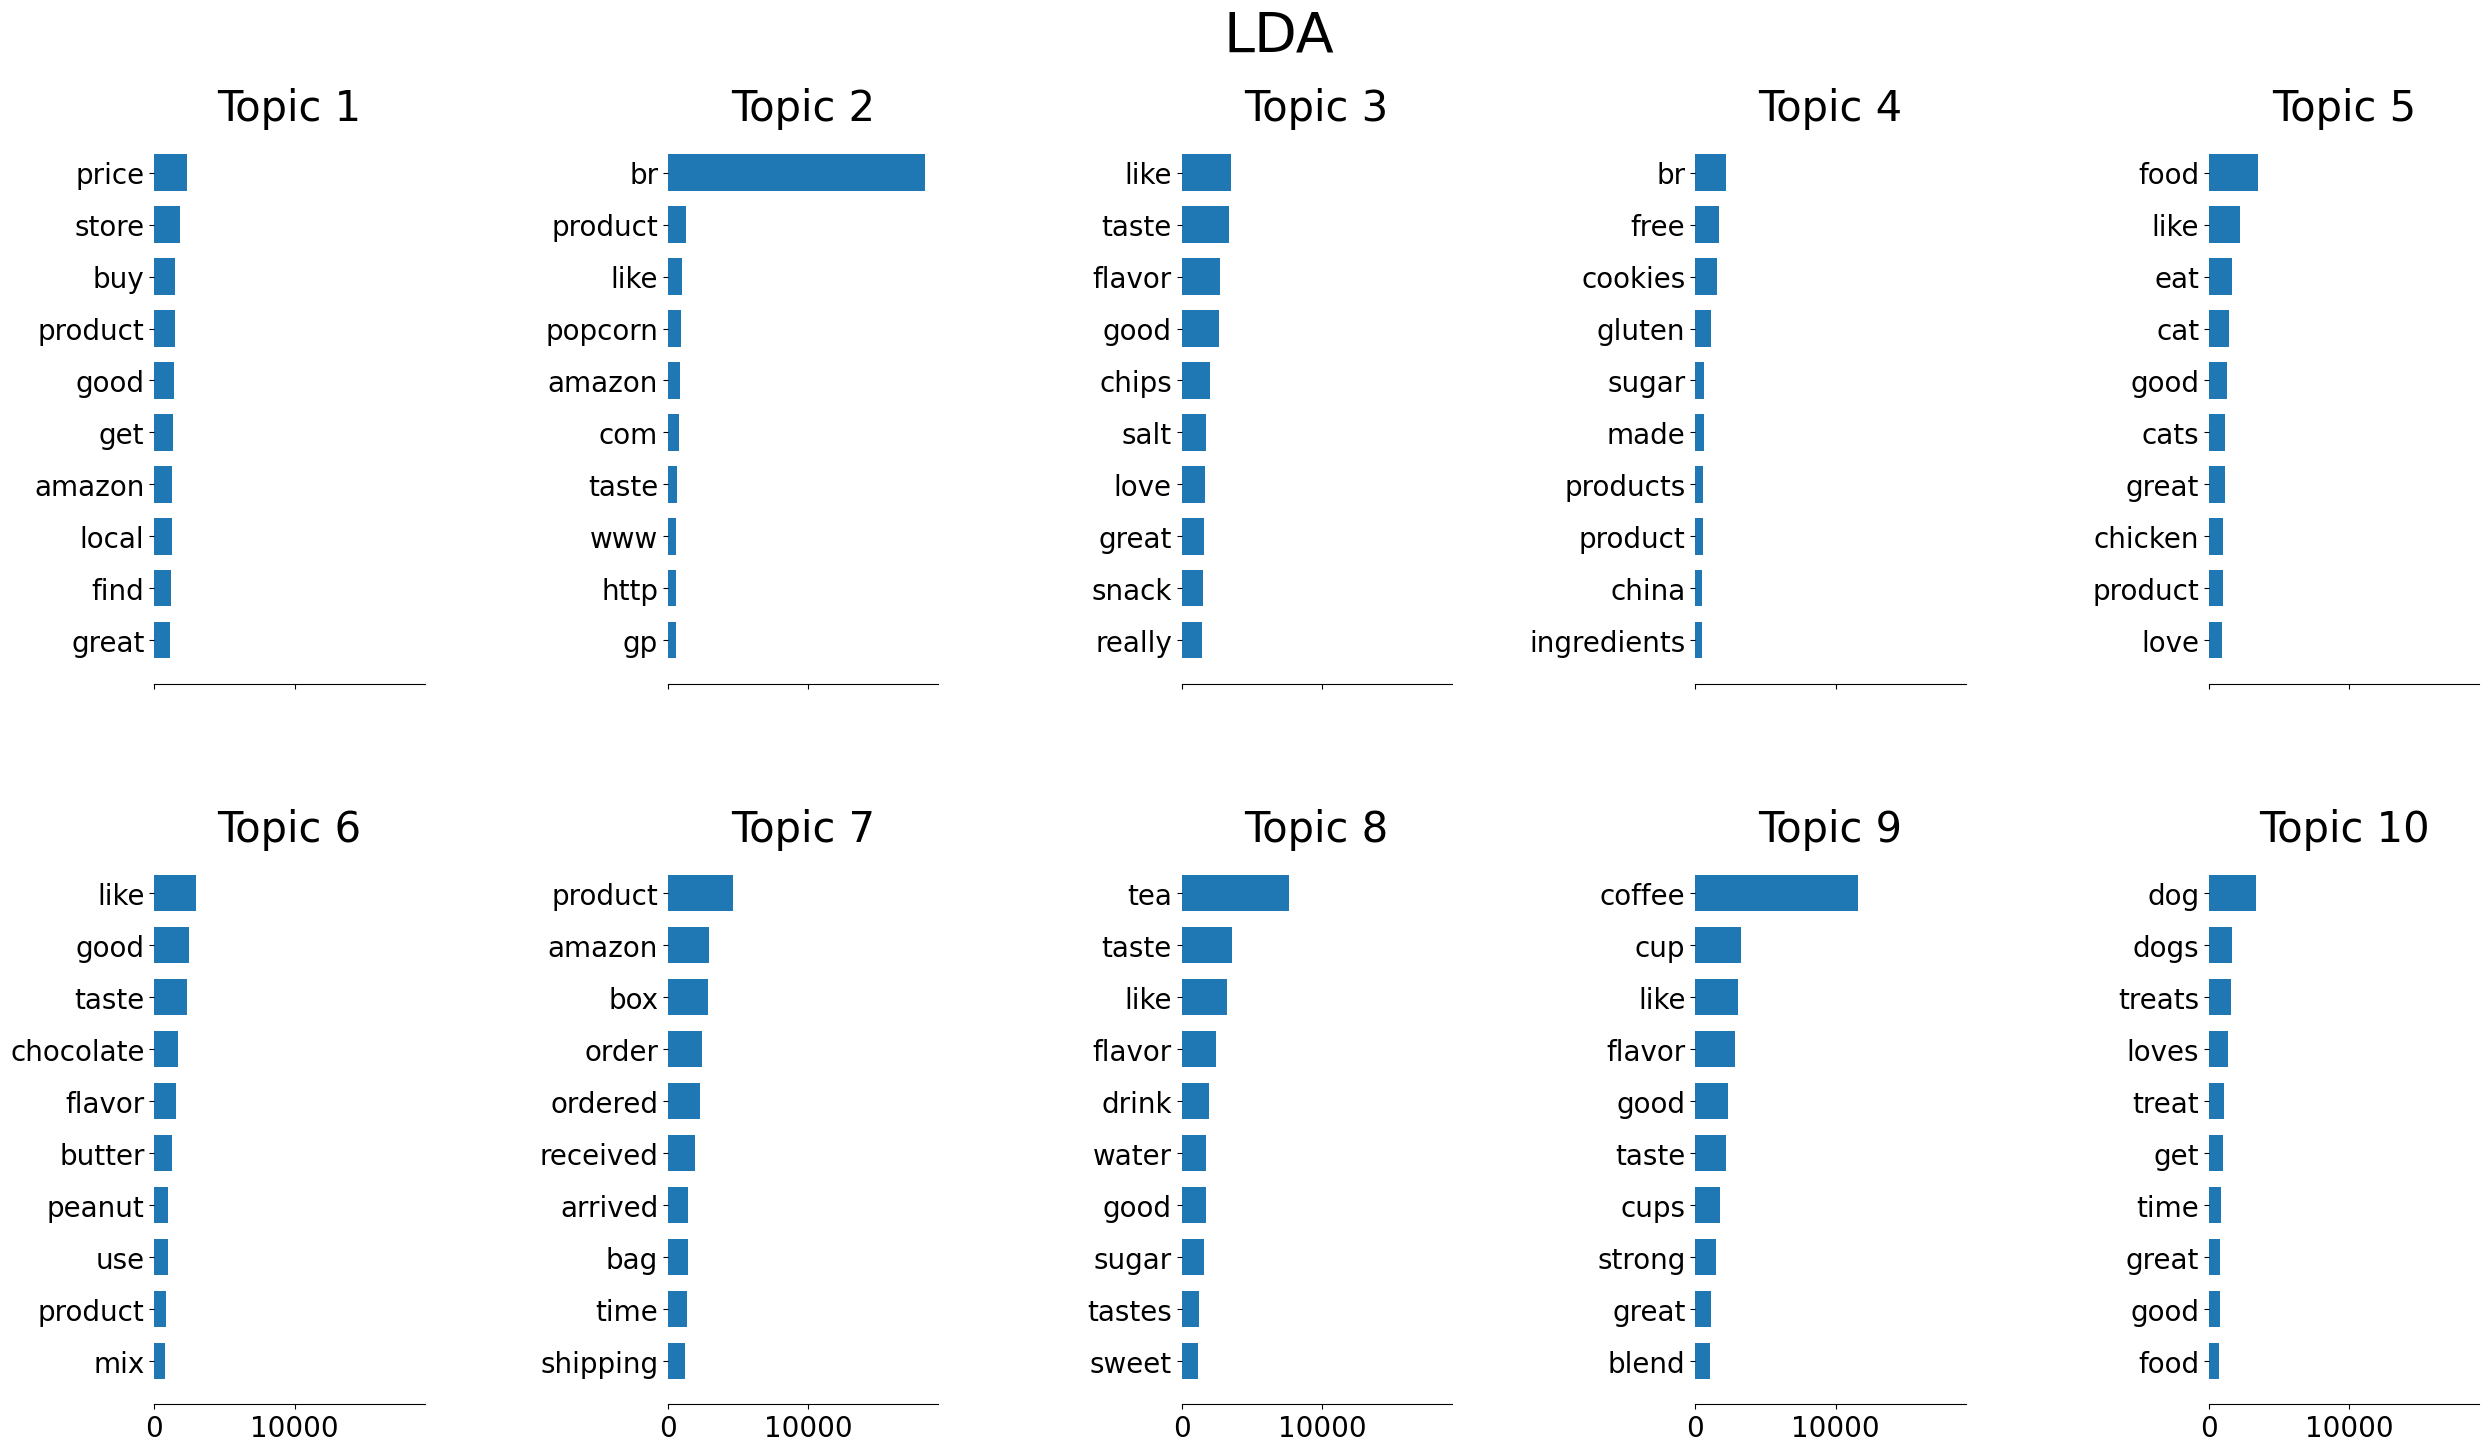

In [27]:
# Words per topics
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names)

In [28]:
Z = lda.transform(X)

In [2]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('bbc_text_cls.csv')
df.head(2)

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business


In [4]:
df['labels'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: labels, dtype: int64

In [5]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()
  
import nltk
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
df.dropna(axis = 0, how ='any',inplace=True) 
df['text'] = df['text'].apply(clean_text)
df['Num_words_text'] = df['text'].apply(lambda x:len(str(x).split())) 

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

df['text']=df['text'].apply(remove_stopwords)

In [8]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
    output = []
    for sent in texts:
        doc = nlp(sent) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
    return output
  
text_list=df['text'].tolist()
tokenized_reviews = lemmatization(text_list)

In [9]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [10]:
lda_model.print_topics()

[(0,
  '0.025*"good" + 0.024*"year" + 0.013*"last" + 0.011*"award" + 0.010*"film" + 0.009*"number" + 0.009*"world" + 0.008*"first" + 0.007*"final" + 0.007*"second"'),
 (1,
  '0.086*"game" + 0.020*"time" + 0.019*"player" + 0.013*"title" + 0.012*"gadget" + 0.011*"console" + 0.011*"world" + 0.008*"point" + 0.008*"match" + 0.008*"first"'),
 (2,
  '0.029*"mobile" + 0.027*"phone" + 0.023*"people" + 0.021*"technology" + 0.016*"digital" + 0.016*"music" + 0.015*"service" + 0.014*"device" + 0.013*"video" + 0.012*"year"'),
 (3,
  '0.023*"year" + 0.013*"market" + 0.011*"sale" + 0.010*"price" + 0.010*"company" + 0.009*"last" + 0.009*"economy" + 0.008*"growth" + 0.008*"firm" + 0.008*"month"'),
 (4,
  '0.041*"apple" + 0.024*"club" + 0.013*"handheld" + 0.013*"player" + 0.010*"music" + 0.009*"computer" + 0.009*"football" + 0.007*"former" + 0.007*"arsenal" + 0.007*"manager"'),
 (5,
  '0.024*"people" + 0.017*"user" + 0.015*"site" + 0.014*"system" + 0.012*"online" + 0.012*"service" + 0.012*"website" + 0.0

In [11]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\User\anaconda3\envs\newtensorflow\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.041363  0.041530       1        1  22.647665
3     -0.096772  0.048221       2        1  19.895861
0      0.093575  0.150749       3        1  15.467010
5     -0.173035 -0.026078       4        1   9.753370
2     -0.141713  0.046770       5        1   9.520967
1      0.070402  0.226337       6        1   7.648652
6     -0.184762 -0.133773       7        1   4.690532
4      0.203337 -0.037527       8        1   4.357861
7      0.040184 -0.179784       9        1   3.636769
9      0.230147 -0.136445      10        1   2.381313, topic_info=         Term         Freq        Total Category  logprob  loglift
3290     game  1554.000000  1554.000000  Default  30.0000  30.0000
31       film   798.000000   798.000000  Default  29.0000  29.0000
751    mobile   628.000000   628.000000  Default  28.0000  28.0000
804     phone   633.000000   633.000000  Default  27.0000  27.0000
7107    apple   413.000000   413.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
330   picture    21.370770   183.020884  Topic10  -5.5513   1.5899
398     child    22.127307   268.269882  Topic10  -5.5165   1.2423
136      many    23.142615   797.926496  Topic10  -5.4717   0.1972
428     woman    20.638242   223.295358  Topic10  -5.5862   1.3562
2558   career    19.737953   164.801205  Topic10  -5.6308   1.6153

[665 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
739       1  0.180905  access
739       4  0.476530  access
739       5  0.273564  access
739       7  0.066185  access
165       1  0.534307  action
...     ...       ...     ...
164       5  0.098154    year
164       6  0.034222    year
164       7  0.021060    year
164       9  0.014667    year
164      10  0.003009    year

[1391 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 1, 6, 3, 2, 7, 5, 8, 10])

In [12]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.649245566766523

Coherence Score:  0.4638532589377247


In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [14]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=15, step=1)

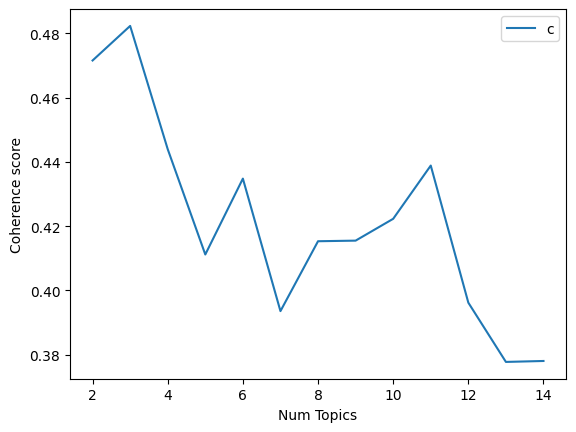

In [15]:
# Show graph
limit=15; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [16]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4715
Num Topics = 3  has Coherence Value of 0.4823
Num Topics = 4  has Coherence Value of 0.4439
Num Topics = 5  has Coherence Value of 0.4112
Num Topics = 6  has Coherence Value of 0.4348
Num Topics = 7  has Coherence Value of 0.3936
Num Topics = 8  has Coherence Value of 0.4153
Num Topics = 9  has Coherence Value of 0.4155
Num Topics = 10  has Coherence Value of 0.4223
Num Topics = 11  has Coherence Value of 0.4388
Num Topics = 12  has Coherence Value of 0.3962
Num Topics = 13  has Coherence Value of 0.3778
Num Topics = 14  has Coherence Value of 0.3781


In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

In [45]:
new_doc = "This is a new document to be classified."

cleaned_doc = clean_text(new_doc)
processed_doc = remove_stopwords(cleaned_doc)
lemmatized_doc = lemmatization([processed_doc])[0]

bow_vector = dictionary.doc2bow(lemmatized_doc)

topic_distribution = lda_model.get_document_topics(bow_vector)

In [46]:
topic_distribution

[(0, 0.0500074),
 (1, 0.0500074),
 (2, 0.05001151),
 (3, 0.0500074),
 (4, 0.0500074),
 (5, 0.050030492),
 (6, 0.0500074),
 (7, 0.050024472),
 (8, 0.54988915),
 (9, 0.0500074)]

In [49]:
from scipy import sparse

In [51]:
a = np.array([1,2,3])

In [53]:
sparse.csr_matrix(a)

<1x3 sparse matrix of type '<class 'numpy.intc'>'
	with 3 stored elements in Compressed Sparse Row format>